In [2]:
%pip install --quiet --upgrade diffusers transformers accelerate invisible_watermark mediapy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127

In [3]:
use_refiner = False

In [4]:
import mediapy as media
import random
import sys
import torch
from diffusers import DiffusionPipeline
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    )
if use_refiner:
  refiner = DiffusionPipeline.from_pretrained(
      "stabilityai/stable-diffusion-xl-refiner-1.0",
      text_encoder_2=pipe.text_encoder_2,
      vae=pipe.vae,
      torch_dtype=torch.float16,
      use_safetensors=True,
      variant="fp16",
  )
  refiner = refiner.to("cuda")
  pipe.enable_model_cpu_offload()
else:
  pipe = pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2%2Fconfig.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_2%2Fspecial_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2%2Ftokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Prompt:	a photo of Pikachu fine dining with a view to the Eiffel Tower
Seed:	1404361669563211938


""

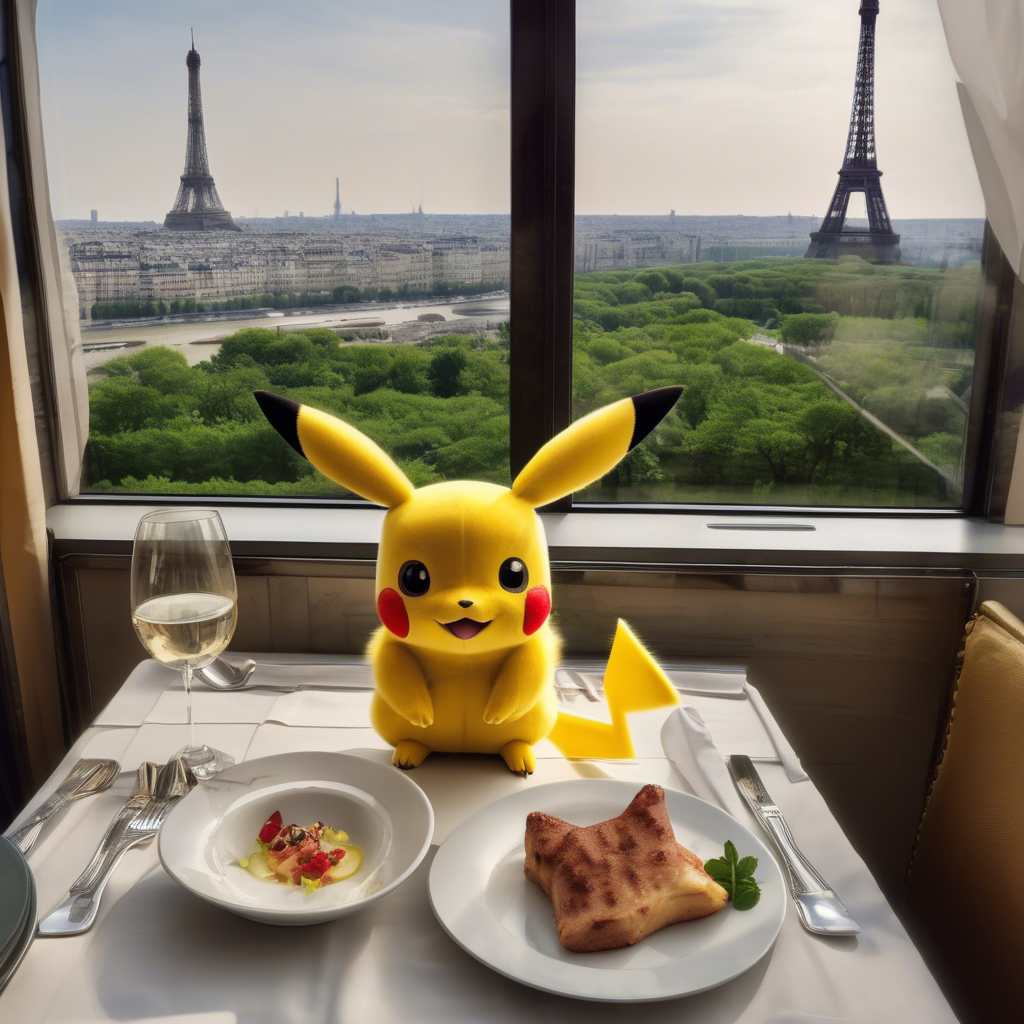

In [6]:
#prompt = "a photo of Pikachu fine dining with a view to the Eiffel Tower"
#prompt = "a photo of beautiful shri ram and sita "
#prompt ="19-year-old woman” by Steve McCurry, 35mm, F/2.8, insanely detailed and intricate, character, hypermaximalist, elegant, ornate, beautiful, exotic, revealing, appealing, attractive, amative, hyper-realistic, super detailed, popular on Flickr"
#prompt = "Full body portrait of a beutiful and sexy young woman. She is swedish and wears a Skim dress. She is 18. Large eyes, large lips, small nose, summer evening. Looks like Christina Hendricks. Photograph taken with Canon EOS R3."
#prompt = "Portrait of a beutiful young woman. She is swedish and wears a tight black dress. She is 18."
#prompt = "A photo of beautiful harry potter"
#prompt ="Fairy multilayered tree house in world tree, decorating flowers, mirror water, mysterious fog, scatter drawing, Complex, multilayered fortress, sunset, another world, lingt art, detail, 32k resolution, oil painting, hyperrealism, Award-winning"
#prompt = "garden, 5'3 feet girl, indian skin body, black eye lens, little bit long hair, school dress that include blue frock and half sleeves shirt that has white line on blue shirt, left side VBES name badge, white socks, black girl shoe"
#prompt="Palace, 5'8 feet man, american skin body, blue eye lens, medium hair, white shirt, black blazzer that include black pant, also white horse"
#prompt="Imagine your ideal dream home, a place where you can create the perfect living environment for yourself and your family. Describe this dream home in vivid detail, from its location and architectural style to its interior design and features. What makes it your dream home? How does it reflect your personal tastes, lifestyle, and aspirations? Explore every aspect of this dream home, from the layout of the rooms to the outdoor spaces and amenities. Let your imagination run wild and paint a picture of your dream home that captures your vision of the perfect place to live."
#prompt= "Beyond the walls of your dream home, what does your outdoor paradise look like? Describe the landscape design, gardens, and outdoor amenities that surround your dream house. Is there a sparkling pool, a lush green lawn, or a tranquil patio where you can relax? How does the outdoor space enhance your overall living experience?"
#prompt="human genome labrotary where a scientist making experiment on pink colour gene in white cat and light blue colour dog."
seed = random.randint(0, sys.maxsize)
images = pipe(
    prompt = prompt,
    output_type = "latent" if use_refiner else "pil",
    generator = torch.Generator("cuda").manual_seed(seed),
    ).images
if use_refiner:
  images = refiner(
      prompt = prompt,
      image = images,
      ).images
print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("output.jpg")
print('')